Final Project 20

Team Members:

Aishwarya Bhethanabotla  

Samiksha Sunil Dhemse

Hemant Pillala

Neelaveni Ushakela


**Importing libraries**

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'DATASET/Customer Churn.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP 

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64


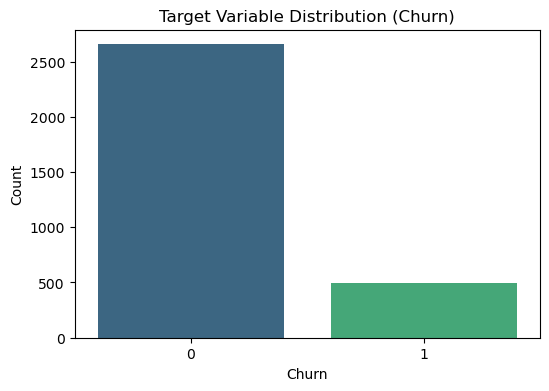

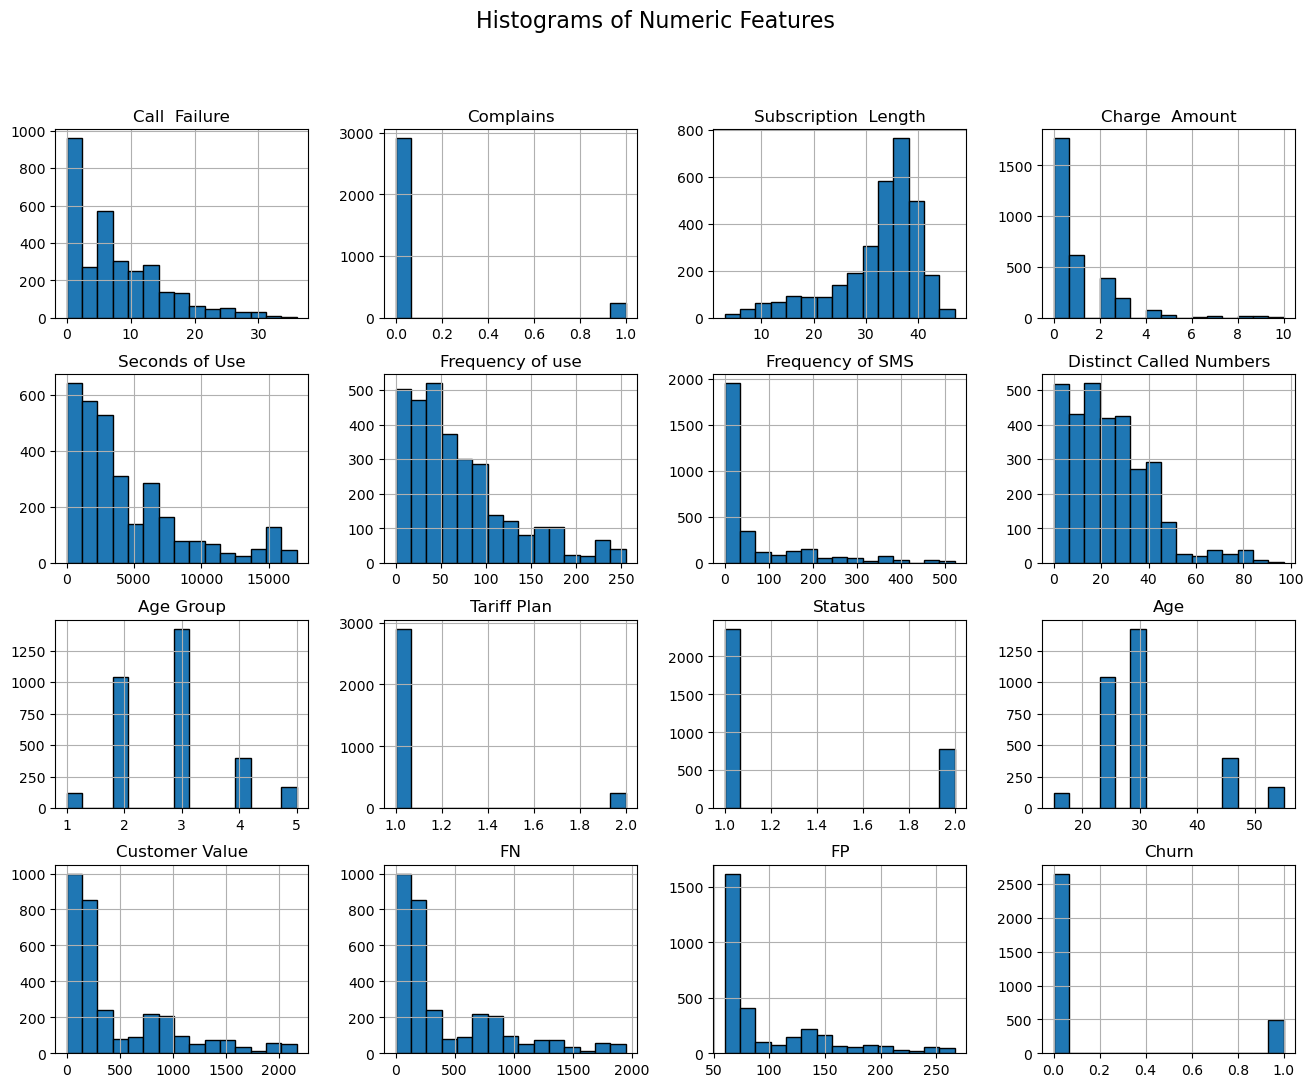

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='viridis')
plt.title('Target Variable Distribution (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# 2. Visualize the distribution of numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_features].hist(figsize=(16, 12), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

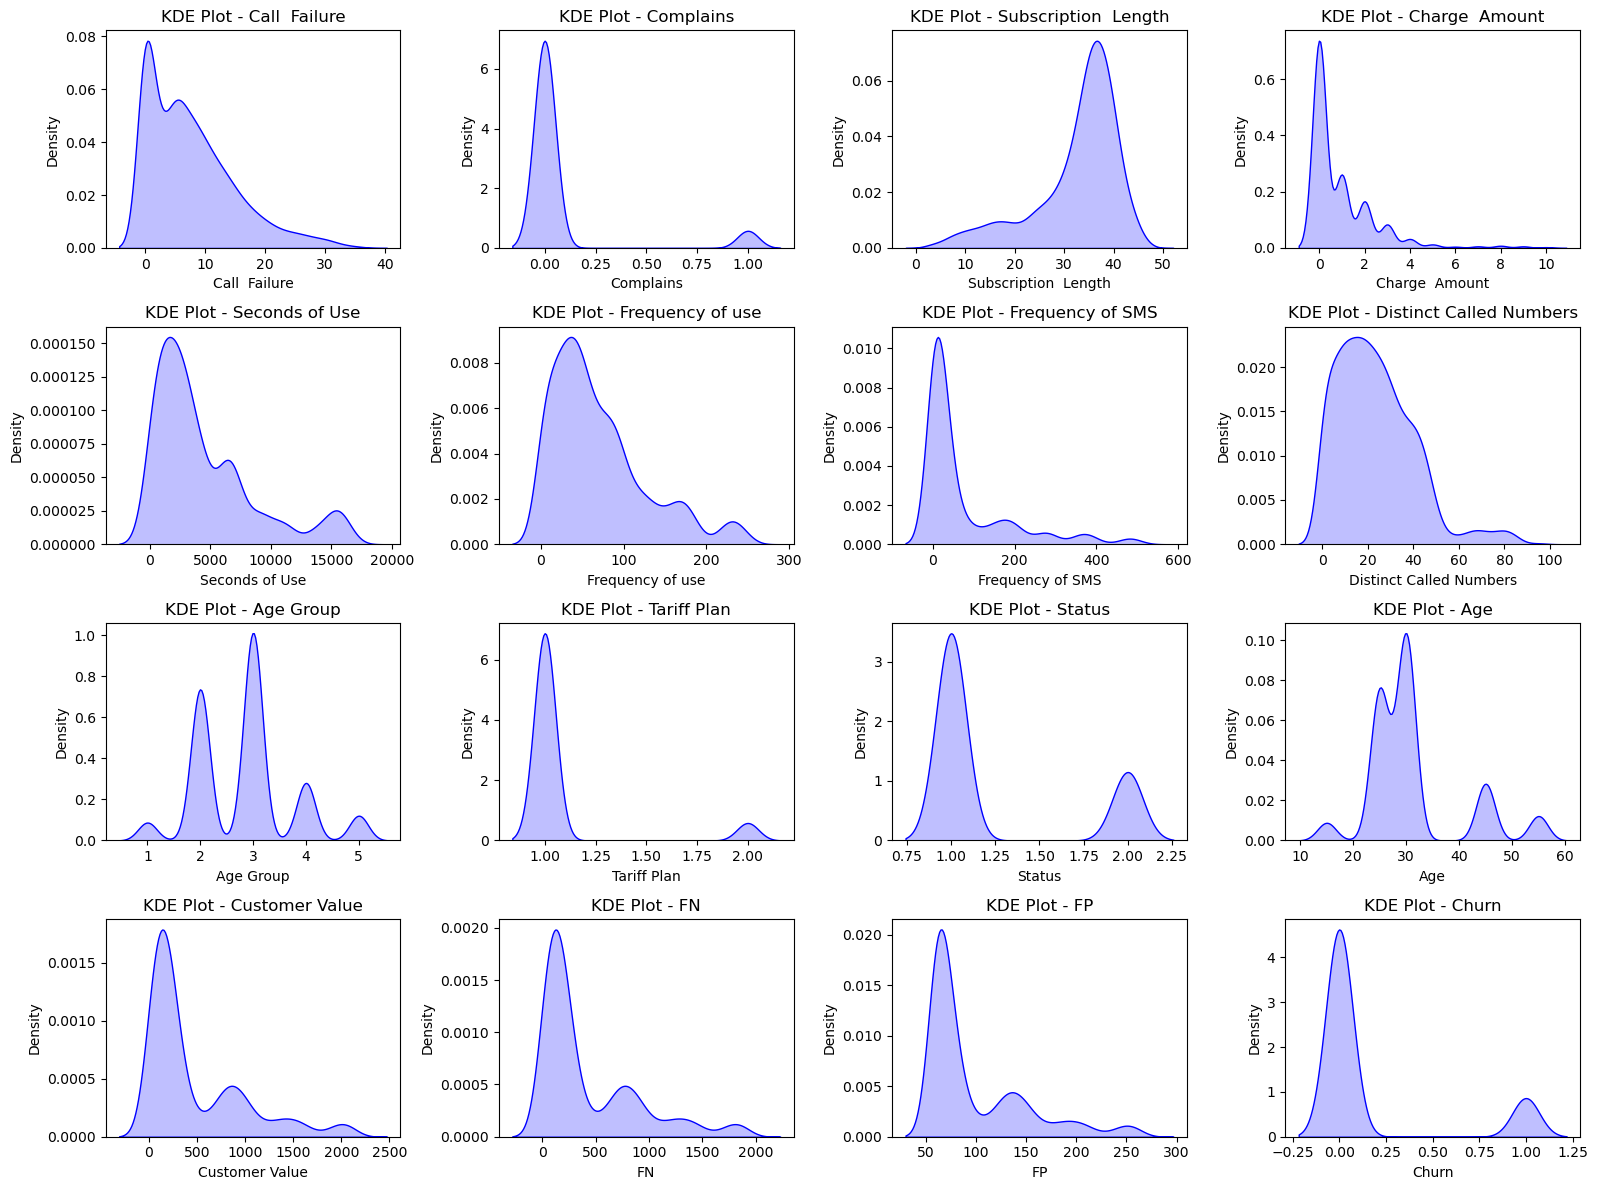

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plots for numerical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(data[feature], fill=True, color='blue')  # Use `fill=True` instead of `shade=True`
    plt.title(f'KDE Plot - {feature}')
plt.tight_layout()
plt.show()

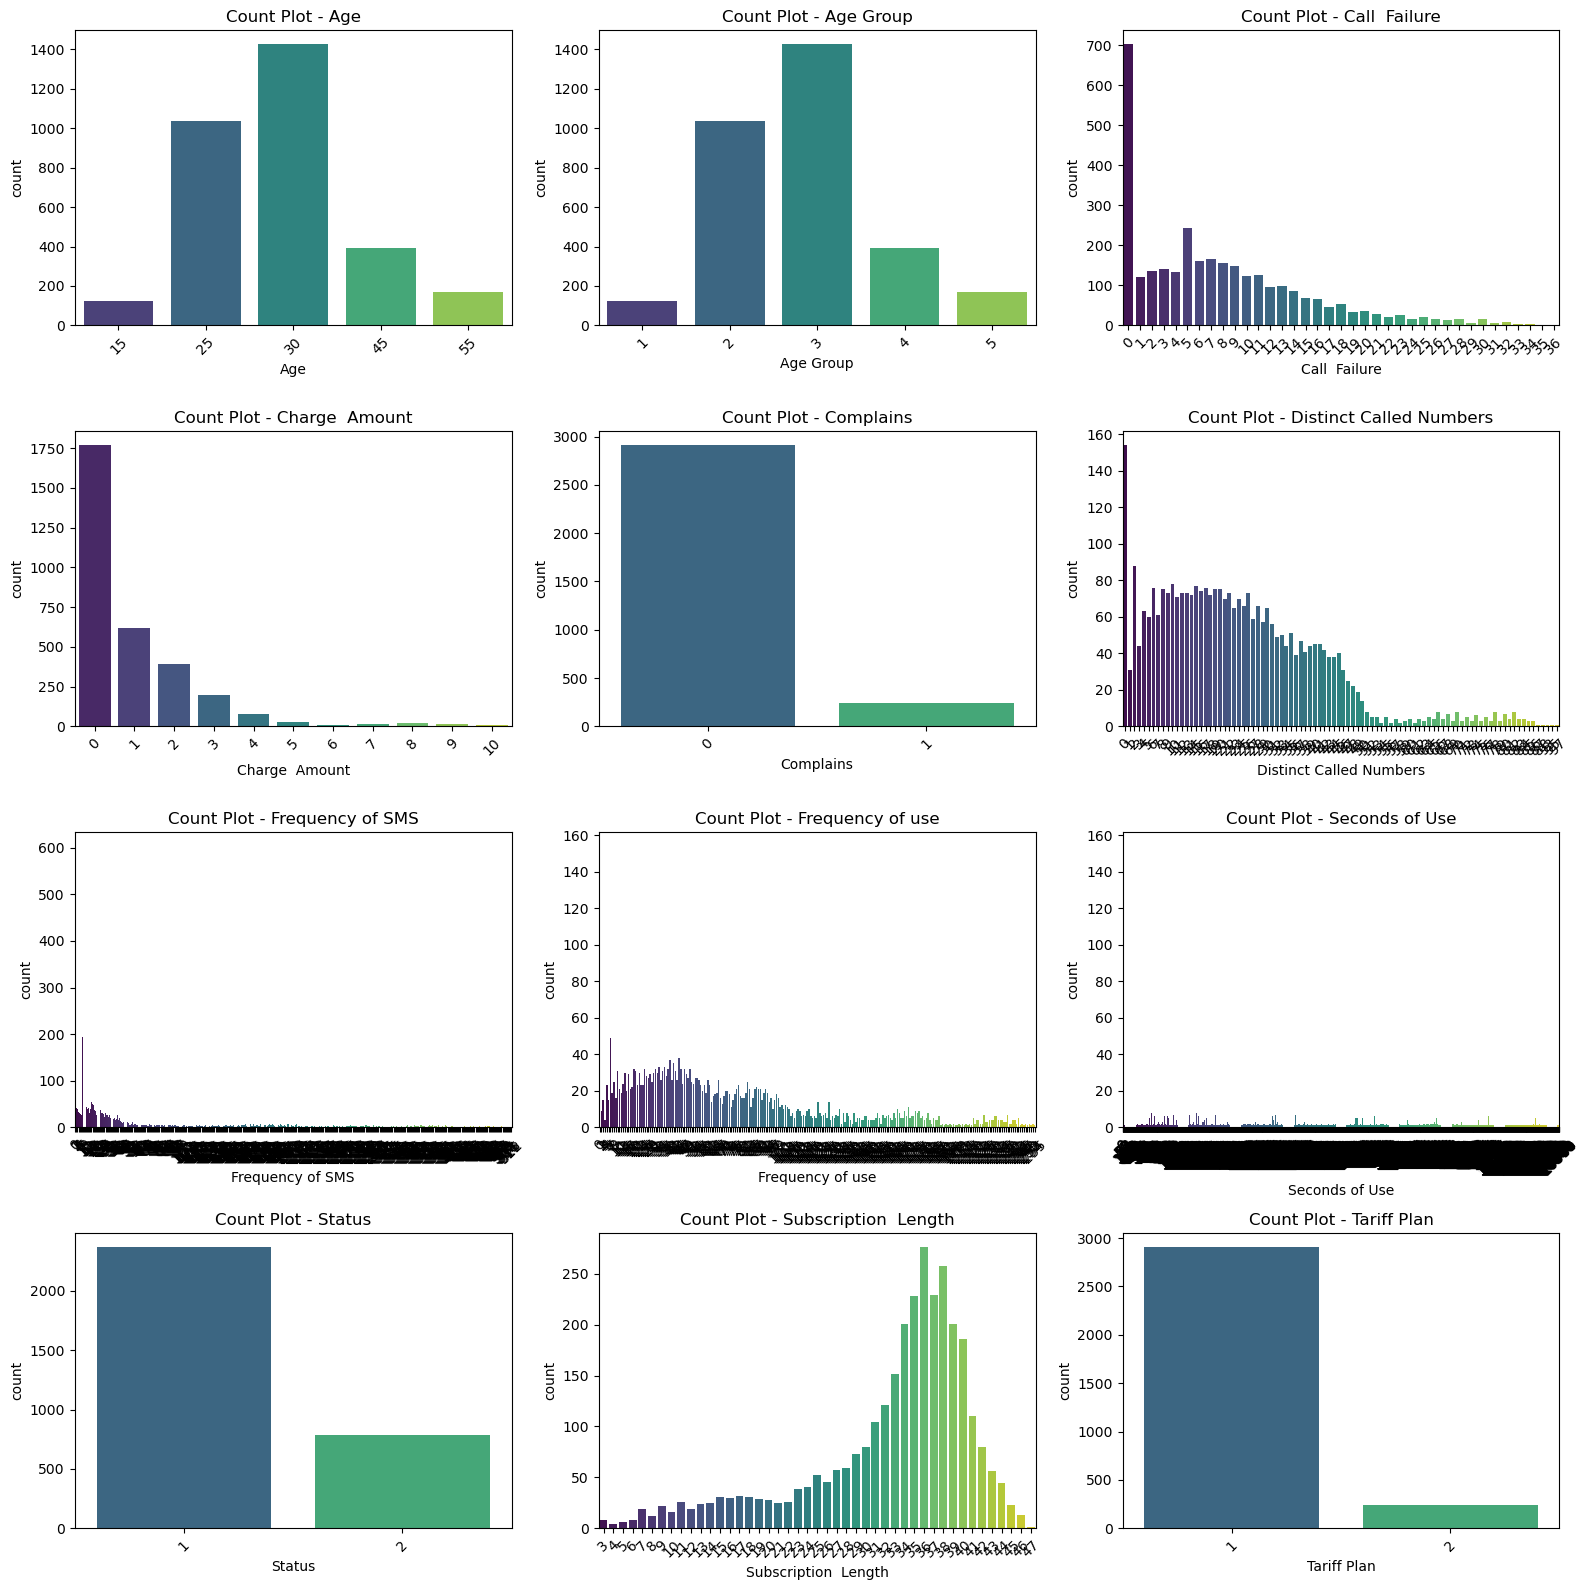

In [ ]:
# Identify categorical features (excluding the target variable)
categorical_features = data.select_dtypes(include=['int64', 'object']).columns.difference(['Churn'])

# Adjust subplot grid dynamically
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)  # Determine the number of rows needed

plt.figure(figsize=(16, rows * 4))
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, i + 1)  # Adjust subplot to fit the number of features
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Count Plot - {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/bannu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


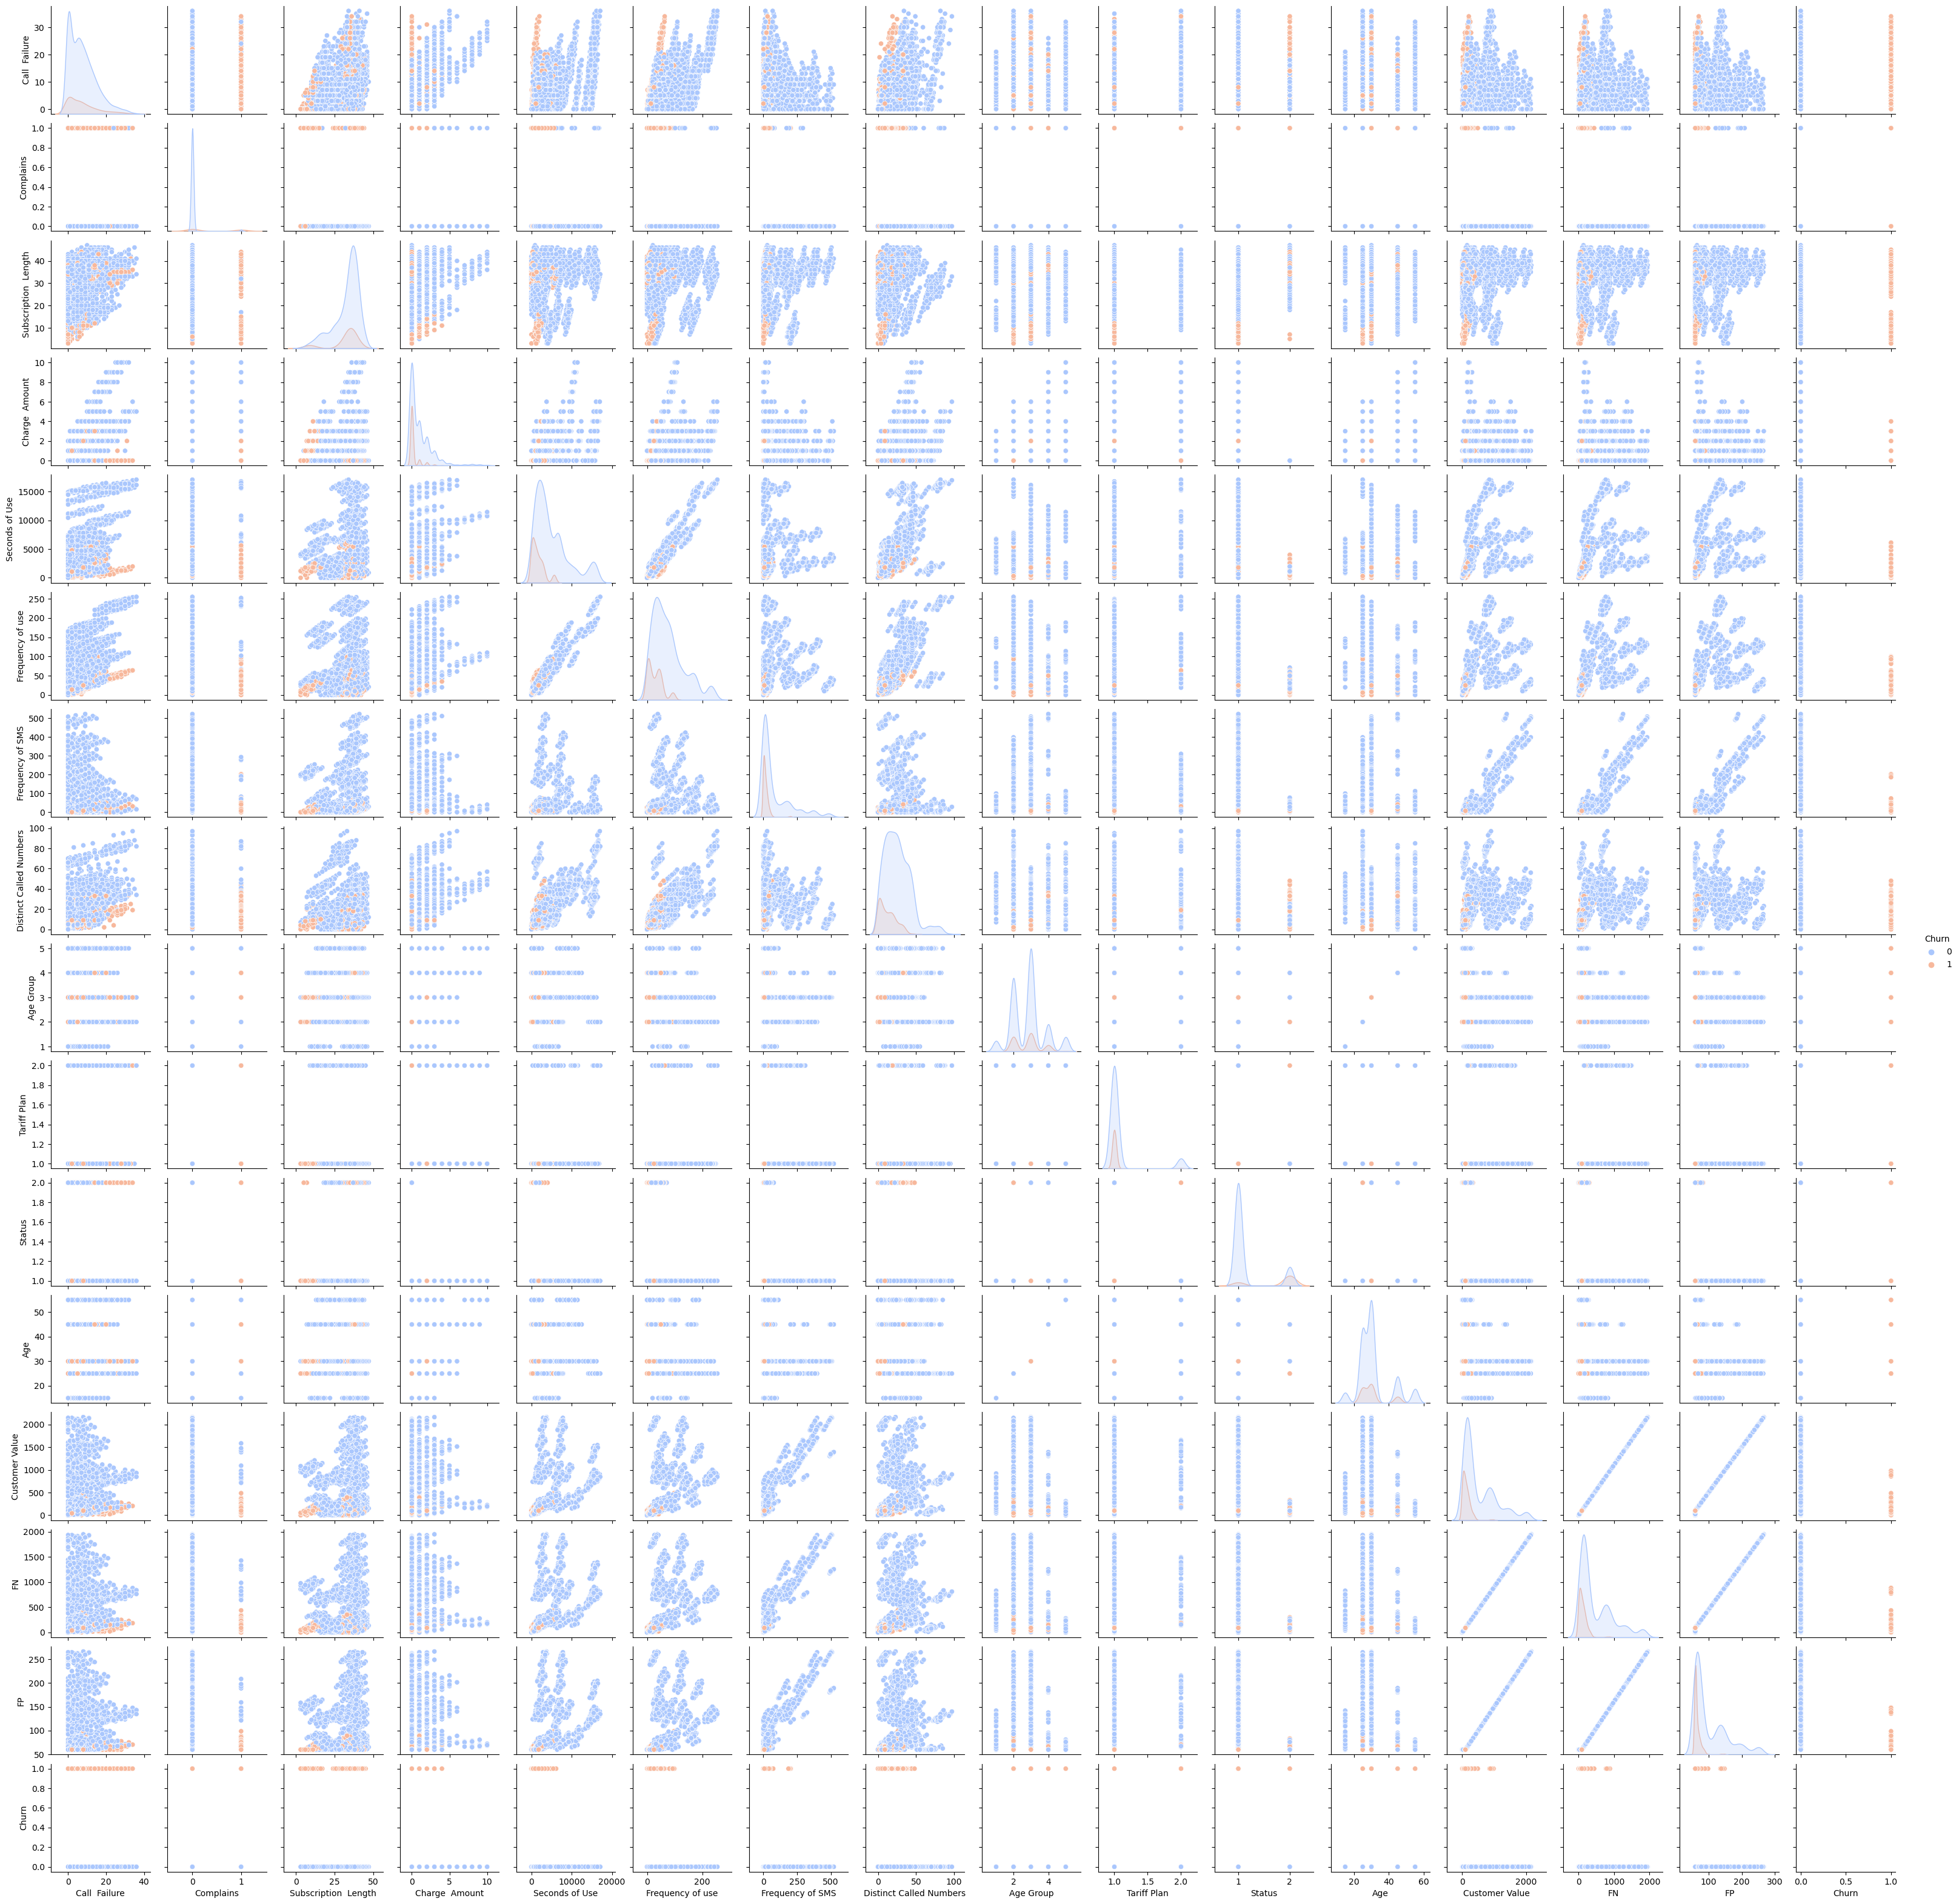

In [ ]:
# Pairplot to show relationships
sns.pairplot(data, vars=numeric_features, hue='Churn', palette='coolwarm', diag_kind='kde', height=2)
plt.show()

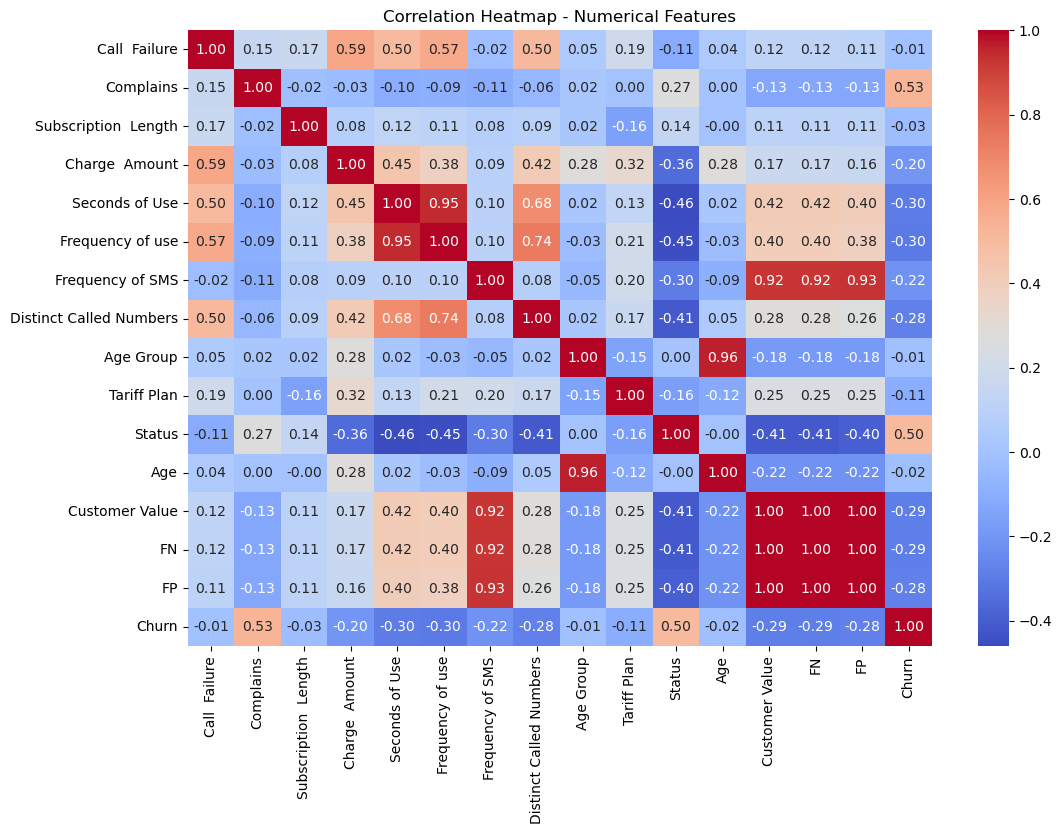

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

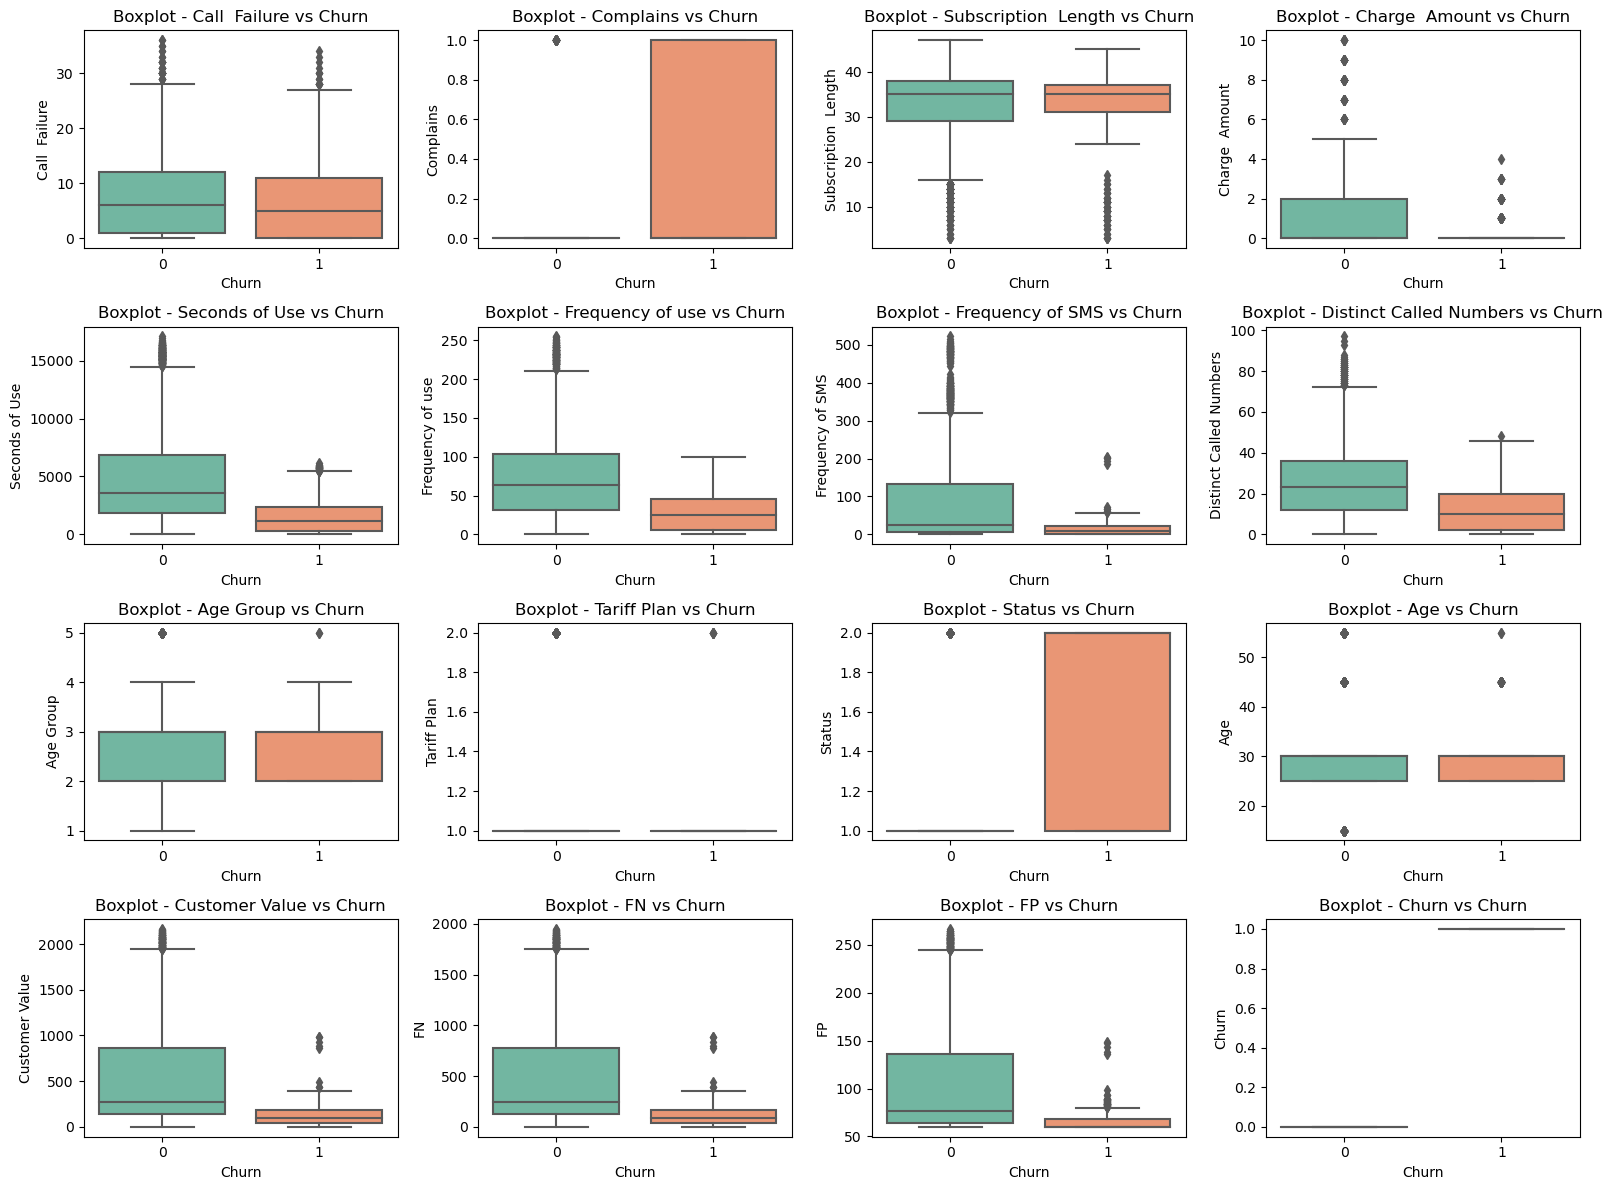

In [ ]:
# Boxplots for numerical features against the target
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Churn', y=feature, data=data, palette='Set2')
    plt.title(f'Boxplot - {feature} vs Churn')
plt.tight_layout()
plt.show()

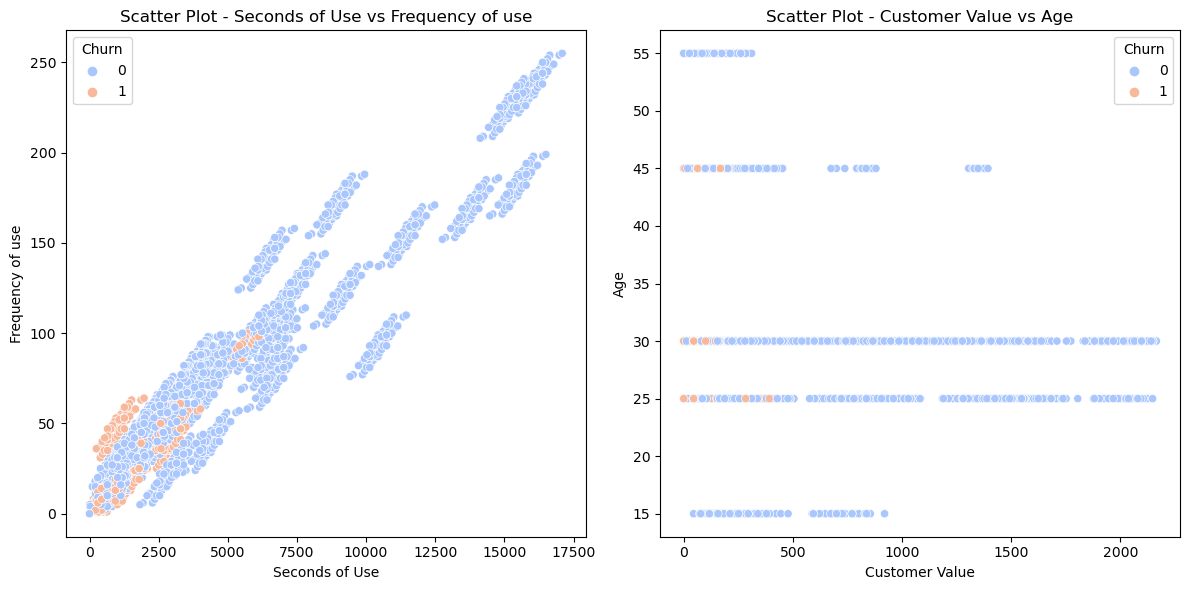

In [ ]:
# Scatter plots for a few selected numerical feature pairs
scatter_pairs = [('Seconds of Use', 'Frequency of use'), ('Customer Value', 'Age')]

plt.figure(figsize=(12, 6))
for i, (x_feature, y_feature) in enumerate(scatter_pairs):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=x_feature, y=y_feature, hue='Churn', data=data, palette='coolwarm')
    plt.title(f'Scatter Plot - {x_feature} vs {y_feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Step 2.1: Statistical summary of the dataset
feature_summary = data.describe()
print("Statistical Summary of the Dataset:")
print(feature_summary)

# Step 2.2: Correlation matrix to assess relationships between features and target variable
correlation_matrix = data.corr()
print("\nCorrelation with Target Variable (Churn):")
print(correlation_matrix['Churn'].sort_values(ascending=False))

Statistical Summary of the Dataset:
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000     

In [ ]:
# Import necessary libraries
import pandas as pd

# Drop redundant features
features_to_drop = ['Charge  Amount', 'Frequency of SMS']  # Based on high correlation
data = data.drop(columns=features_to_drop)

print(f"Features dropped: {features_to_drop}")
print(f"Remaining features: {data.columns.tolist()}")

Features dropped: ['Charge  Amount', 'Frequency of SMS']
Remaining features: ['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'FN', 'FP', 'Churn']


In [ ]:
import numpy as np

# Apply log transformation to skewed features
skewed_features = ['Customer Value']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])  # log1p handles log(0) gracefully

print(f"Transformed features (log1p): {skewed_features}")

Transformed features (log1p): ['Customer Value']


In [ ]:
# Drop irrelevant features
irrelevant_features = ['Age', 'Subscription  Length']
data = data.drop(columns=irrelevant_features)

print(f"Irrelevant features dropped: {irrelevant_features}")
print(f"Remaining features after cleanup: {data.columns.tolist()}")

Irrelevant features dropped: ['Age', 'Subscription  Length']
Remaining features after cleanup: ['Call  Failure', 'Complains', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Customer Value', 'FN', 'FP', 'Churn']


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Seconds of Use           3150 non-null   int64  
 3   Frequency of use         3150 non-null   int64  
 4   Distinct Called Numbers  3150 non-null   int64  
 5   Age Group                3150 non-null   int64  
 6   Tariff Plan              3150 non-null   int64  
 7   Status                   3150 non-null   int64  
 8   Customer Value           3150 non-null   float64
 9   FN                       3150 non-null   float64
 10  FP                       3150 non-null   float64
 11  Churn                    3150 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 295.4 KB
None


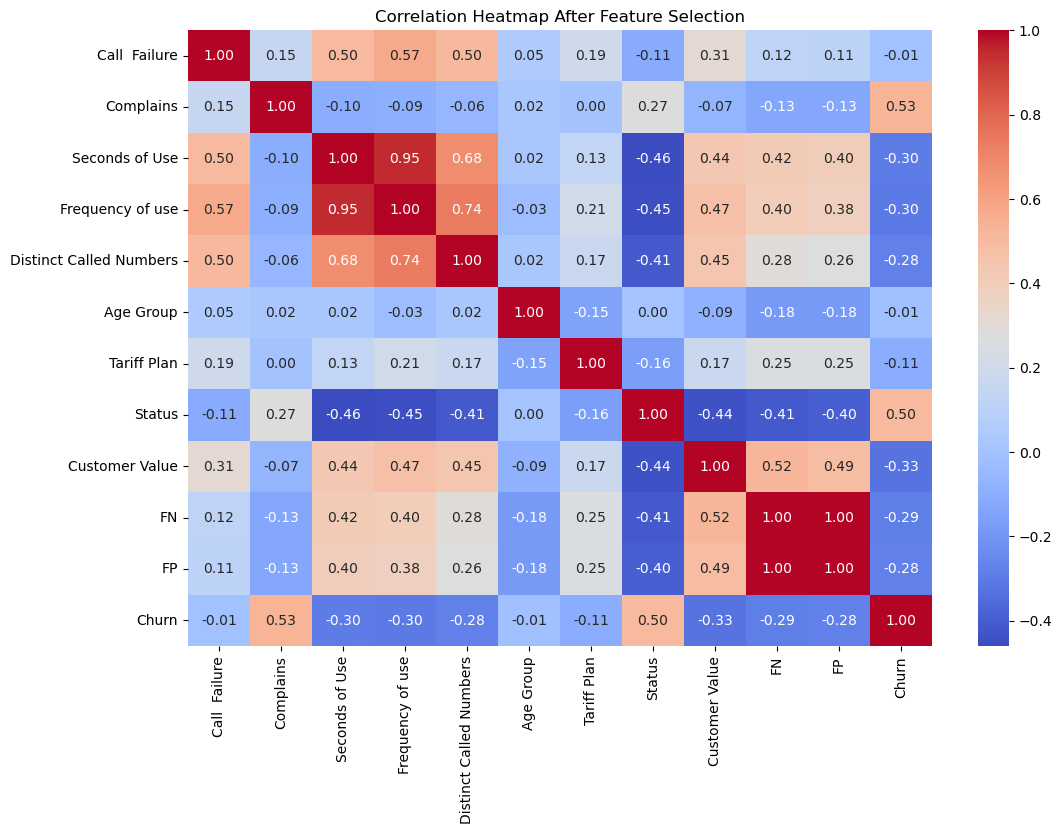

In [ ]:
# Display updated dataset information
print("Updated Dataset Information:")
print(data.info())

# Correlation heatmap after feature removal
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap After Feature Selection")
plt.show()

In [ ]:
print("Current columns in the dataset:")
print(data.columns)

Current columns in the dataset:
Index(['Call  Failure', 'Complains', 'Seconds of Use', 'Frequency of use',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'FN', 'FP', 'Churn', 'Customer_Value_Complains'],
      dtype='object')


In [ ]:
# Create interaction features
data['Customer_Value_Complains'] = data['Customer Value'] * data['Complains']
data['Usage_Intensity'] = data['Frequency of use'] / (data['Seconds of Use'] + 1e-5)

print("Interaction features added:")
print(data[['Customer_Value_Complains', 'Usage_Intensity']].head())

Interaction features added:
   Customer_Value_Complains  Usage_Intensity
0                       0.0         0.016247
1                       0.0         0.015723
2                       0.0         0.024460
3                       0.0         0.015722
4                       0.0         0.024237


In [ ]:
# One-hot encode categorical features
categorical_features = ['Tariff Plan', 'Age Group']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("One-hot encoded features added:")
print(data.head())

One-hot encoded features added:
   Call  Failure  Complains  Seconds of Use  Frequency of use  \
0              8          0            4370                71   
1              0          0             318                 5   
2             10          0            2453                60   
3             10          0            4198                66   
4              3          0            2393                58   

   Distinct Called Numbers  Status  Customer Value         FN        FP  \
0                       17       1        1.839199   177.8760   69.7640   
1                        4       2        1.579163    41.4315   60.0000   
2                       24       1        2.120815  1382.8680  203.6520   
3                       35       1        1.869473   216.0180   74.0020   
4                       33       1        1.789942   131.2245   64.5805   

   Churn  Customer_Value_Complains  Usage_Intensity  Tariff Plan_2  \
0      0                       0.0         0.016247     

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Scale the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Scaled feature values:")
print(X_scaled.head())

Scaled feature values:
   Call  Failure  Complains  Seconds of Use  Frequency of use  \
0       0.051229   -0.28783       -0.024411          0.026816   
1      -1.050285   -0.28783       -0.989807         -1.122926   
2       0.326608   -0.28783       -0.481140         -0.164807   
3       0.326608   -0.28783       -0.065390         -0.060285   
4      -0.637217   -0.28783       -0.495435         -0.199648   

   Distinct Called Numbers    Status  Customer Value        FN        FP  \
0                -0.378158 -0.574662        0.115429 -0.528759 -0.562750   
1                -1.133331  1.740153       -0.503724 -0.822036 -0.755272   
2                 0.028473 -0.574662        0.785966  2.061285  2.077183   
3                 0.667466 -0.574662        0.187515 -0.446775 -0.479188   
4                 0.551285 -0.574662       -0.001852 -0.629033 -0.664956   

   Customer_Value_Complains  Usage_Intensity  Tariff Plan_2  Age Group_2  \
0                 -0.276513        -0.102606      -0.

In [ ]:
# Display updated dataset information
print("Dataset after feature engineering and scaling:")
print(X_scaled.info())

Dataset after feature engineering and scaling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Call  Failure             3150 non-null   float64
 1   Complains                 3150 non-null   float64
 2   Seconds of Use            3150 non-null   float64
 3   Frequency of use          3150 non-null   float64
 4   Distinct Called Numbers   3150 non-null   float64
 5   Status                    3150 non-null   float64
 6   Customer Value            3150 non-null   float64
 7   FN                        3150 non-null   float64
 8   FP                        3150 non-null   float64
 9   Customer_Value_Complains  3150 non-null   float64
 10  Usage_Intensity           3150 non-null   float64
 11  Tariff Plan_2             3150 non-null   float64
 12  Age Group_2               3150 non-null   float64
 13  Age Group_3     

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split Completed")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Train-Test Split Completed
Training set size: 2520
Testing set size: 630


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Balance the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("SMOTE Applied to Training Data")
print(f"Balanced Training set size: {X_train_balanced.shape[0]}")
print(f"Class distribution after SMOTE:\n{y_train_balanced.value_counts()}")

SMOTE Applied to Training Data
Balanced Training set size: 4248
Class distribution after SMOTE:
Churn
0    2124
1    2124
Name: count, dtype: int64


Class distribution after SMOTE

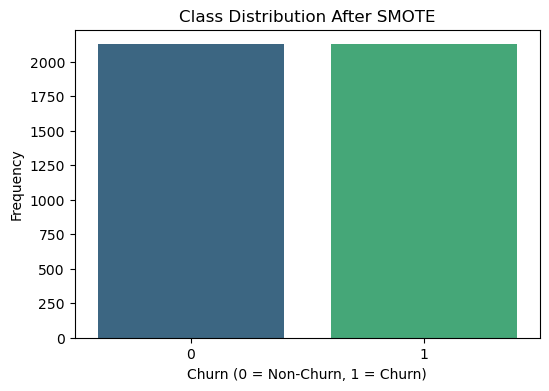

In [ ]:
# Plot the class distribution after SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Churn (0 = Non-Churn, 1 = Churn)")
plt.ylabel("Frequency")
plt.show()

**Logistic Regression**

Logistic Regression Performance:
Accuracy: 0.8429
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       531
           1       0.50      0.83      0.62        99

    accuracy                           0.84       630
   macro avg       0.73      0.84      0.76       630
weighted avg       0.89      0.84      0.86       630

ROC-AUC Score: 0.924232912933478


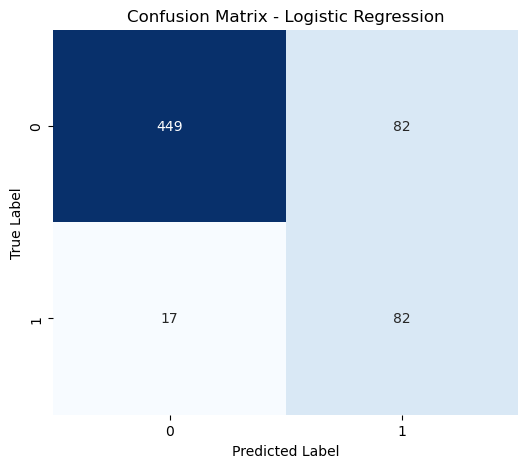

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_log_reg))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_log_reg, title="Confusion Matrix - Logistic Regression")

**Decision Tree**




Fitting 5 folds for each of 8 candidates, totalling 40 fits
Decision Tree Performance:
Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Accuracy: 0.9413
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       531
           1       0.78      0.88      0.82        99

    accuracy                           0.94       630
   macro avg       0.88      0.92      0.89       630
weighted avg       0.95      0.94      0.94       630

ROC-AUC Score: 0.929540223325534


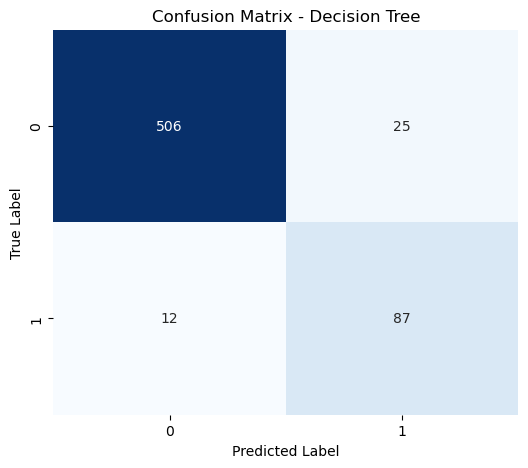

In [ ]:
# Decision Tree with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None]
}

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Get best parameters and estimator
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_dt))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, title="Confusion Matrix - Decision Tree")

**Random Forest**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest Performance:
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.9508
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       531
           1       0.81      0.89      0.85        99

    accuracy                           0.95       630
   macro avg       0.90      0.93      0.91       630
weighted avg       0.95      0.95      0.95       630

ROC-AUC Score: 0.9855142764747284


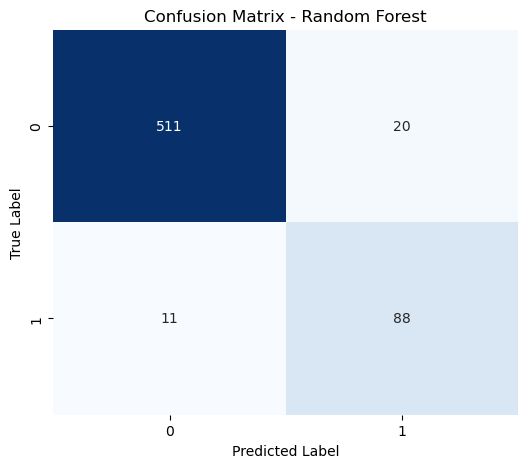

In [ ]:
# Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set up parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, verbose=1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Get best parameters and estimator
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate the model
print("Random Forest Performance:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, title="Confusion Matrix - Random Forest")

XGBoost

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/b

/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/b

/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/b

/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/bannu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/b

XGBoost Performance:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.9571
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       531
           1       0.84      0.90      0.87        99

    accuracy                           0.96       630
   macro avg       0.91      0.93      0.92       630
weighted avg       0.96      0.96      0.96       630

ROC-AUC Score: 0.9849816431737335


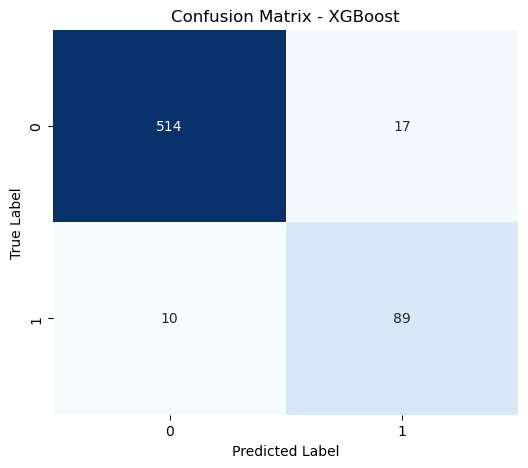

In [ ]:
# XGBoost with GridSearchCV
from xgboost import XGBClassifier

# Set up parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15]
}

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5, verbose=1)
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# Get best parameters and estimator
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Evaluate the model
print("XGBoost Performance:")
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_xgb, title="Confusion Matrix - XGBoost")

**KNN**

KNN Performance:
Accuracy: 0.9286
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       531
           1       0.72      0.88      0.79        99

    accuracy                           0.93       630
   macro avg       0.85      0.91      0.88       630
weighted avg       0.94      0.93      0.93       630

ROC-AUC Score: 0.9570849740341265


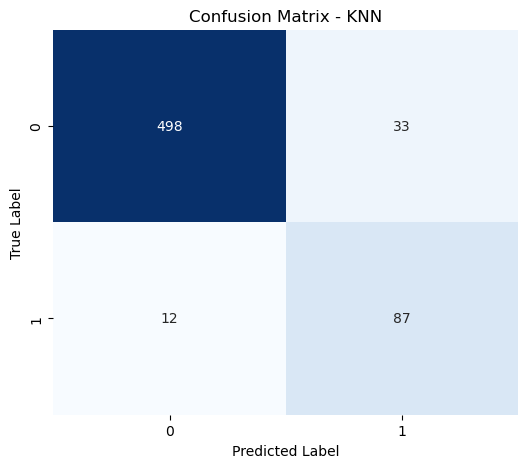

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_knn))
plot_confusion_matrix(y_test, y_pred_knn, title="Confusion Matrix - KNN")

**Naive Bayes**

Naive Bayes Performance:
Accuracy: 0.7222
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.69      0.81       531
           1       0.35      0.91      0.51        99

    accuracy                           0.72       630
   macro avg       0.66      0.80      0.66       630
weighted avg       0.88      0.72      0.76       630

ROC-AUC Score: 0.9188875573056363


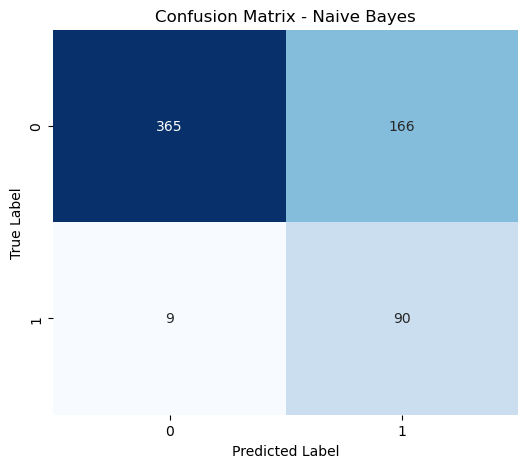

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_nb))
plot_confusion_matrix(y_test, y_pred_nb, title="Confusion Matrix - Naive Bayes")

**SVM**

SVM Performance:
Accuracy: 0.8540
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       531
           1       0.52      0.90      0.66        99

    accuracy                           0.85       630
   macro avg       0.75      0.87      0.78       630
weighted avg       0.91      0.85      0.87       630

ROC-AUC Score: 0.9486389316897792


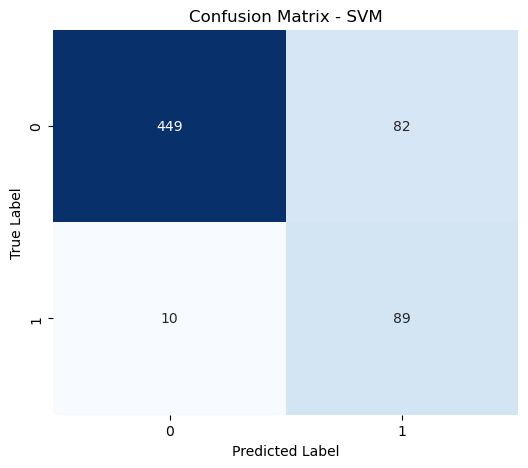

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM (using probability=True for ROC-AUC)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_svm))
plot_confusion_matrix(y_test, y_pred_svm, title="Confusion Matrix - SVM")

**ANN**

ANN Performance:
Accuracy: 0.9492
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       531
           1       0.80      0.91      0.85        99

    accuracy                           0.95       630
   macro avg       0.89      0.93      0.91       630
weighted avg       0.95      0.95      0.95       630

ROC-AUC Score: 0.9824421236850616


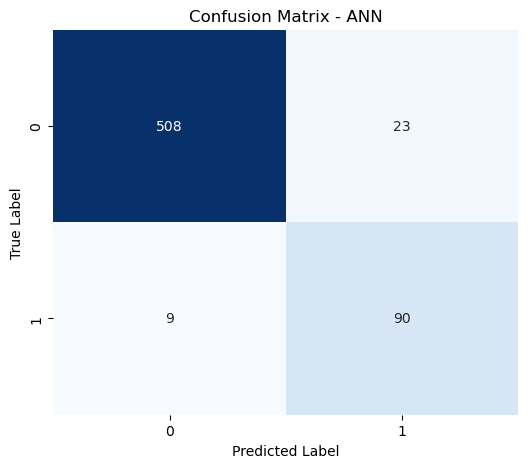

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train ANN
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_ann = ann.predict(X_test)
y_pred_prob_ann = ann.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Performance:")
print(f"Accuracy: {accuracy_ann:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_ann))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_ann))
plot_confusion_matrix(y_test, y_pred_ann, title="Confusion Matrix - ANN")

**GradientBoosting**

Gradient Boosting Performance:
Accuracy: 0.9143
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       531
           1       0.67      0.90      0.77        99

    accuracy                           0.91       630
   macro avg       0.82      0.91      0.86       630
weighted avg       0.93      0.91      0.92       630

ROC-AUC Score: 0.9705720101200328


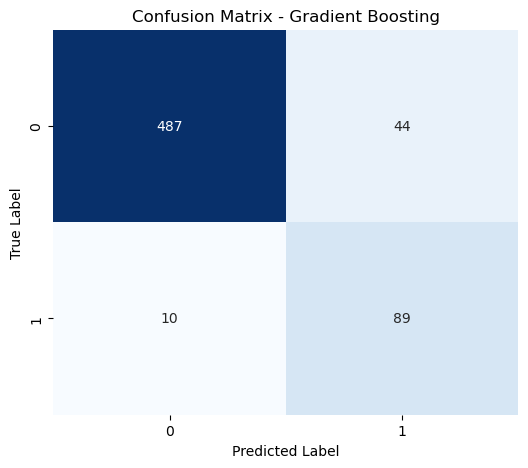

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_gb = gb.predict(X_test)
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_gb))
plot_confusion_matrix(y_test, y_pred_gb, title="Confusion Matrix - Gradient Boosting")

**AdaBoost**

/Users/bannu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance:
Accuracy: 0.8873
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       531
           1       0.60      0.85      0.70        99

    accuracy                           0.89       630
   macro avg       0.78      0.87      0.82       630
weighted avg       0.91      0.89      0.89       630

ROC-AUC Score: 0.9572752002130533


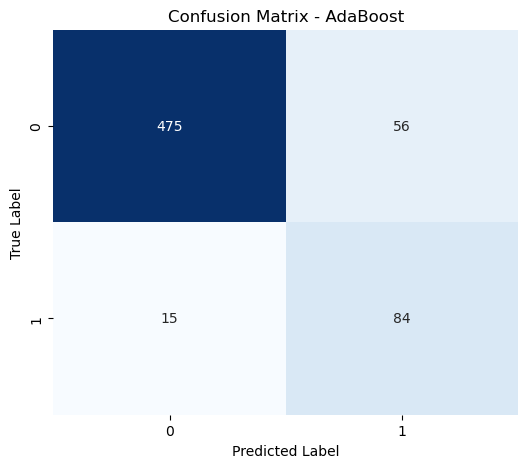

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoost
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_ab = ab.predict(X_test)
y_pred_prob_ab = ab.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("AdaBoost Performance:")
print(f"Accuracy: {accuracy_ab:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_ab))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_ab))
plot_confusion_matrix(y_test, y_pred_ab, title="Confusion Matrix - AdaBoost")

**Function to plot ROC Curve for a model**

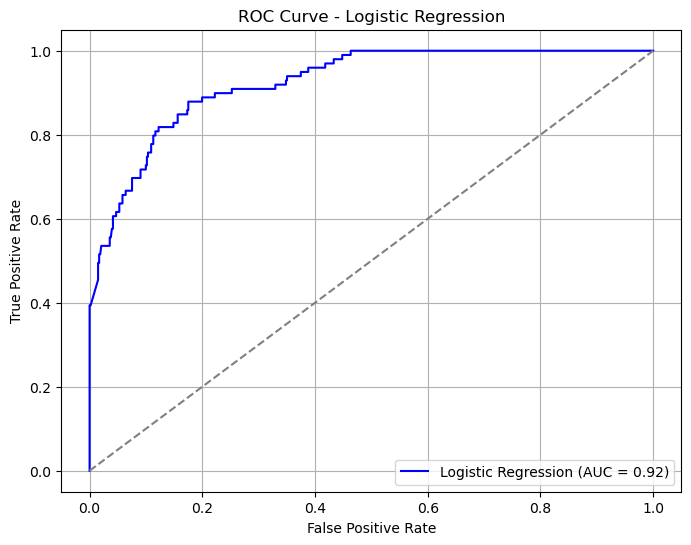

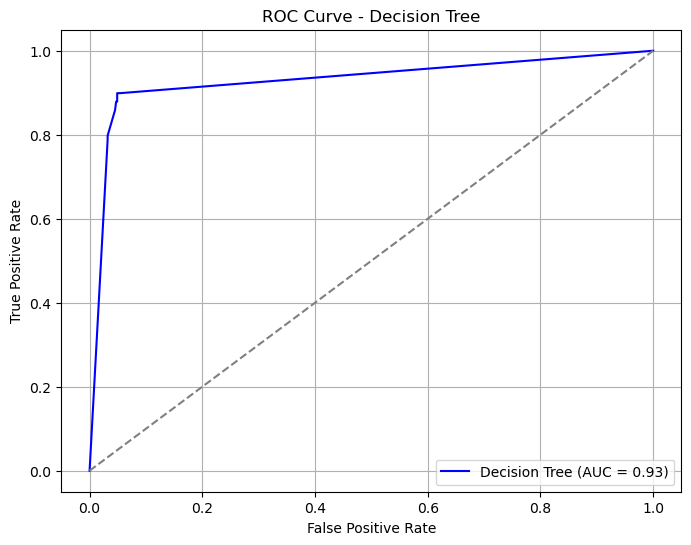

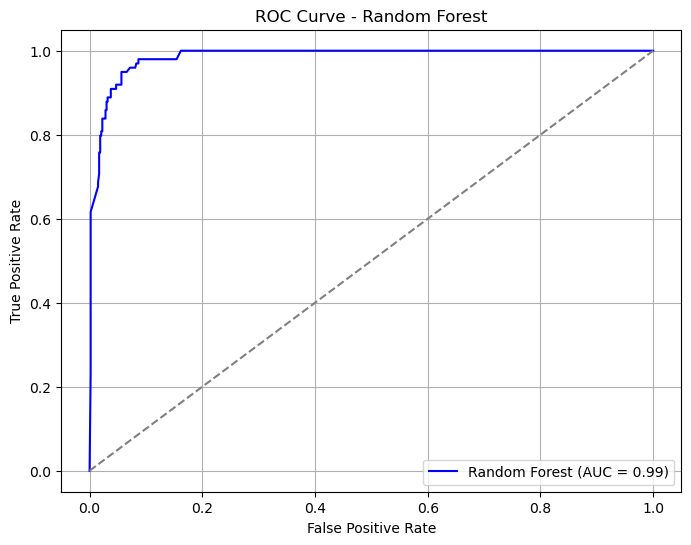

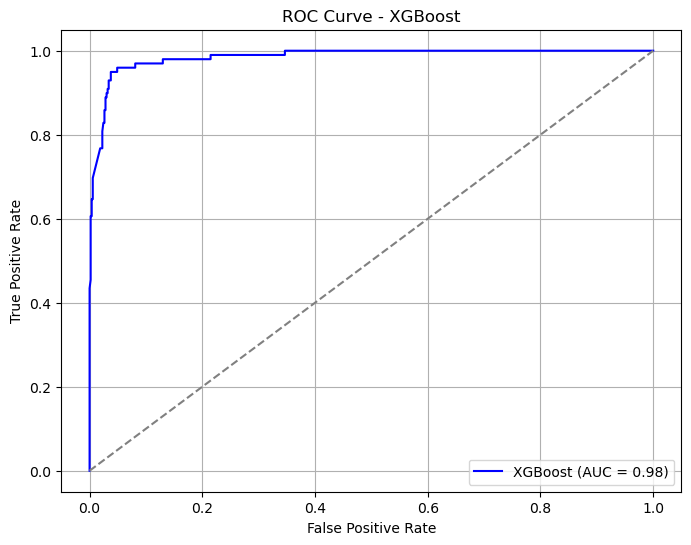

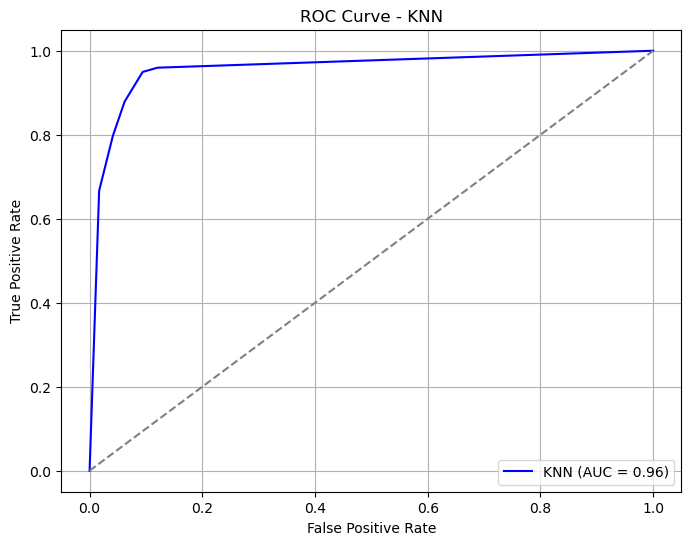

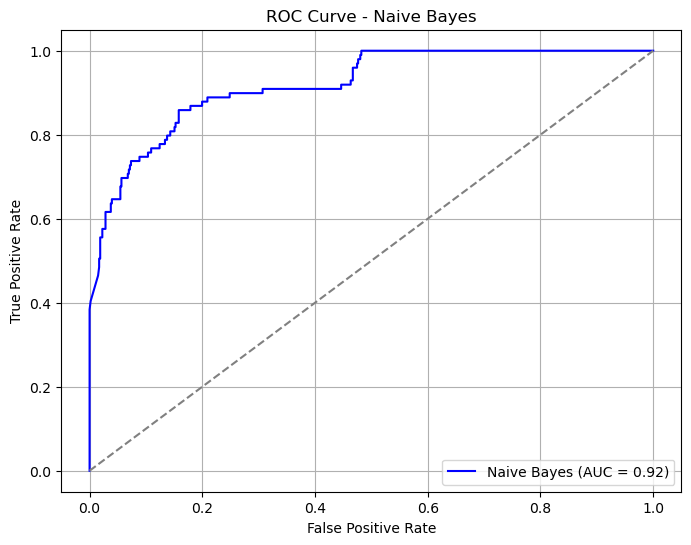

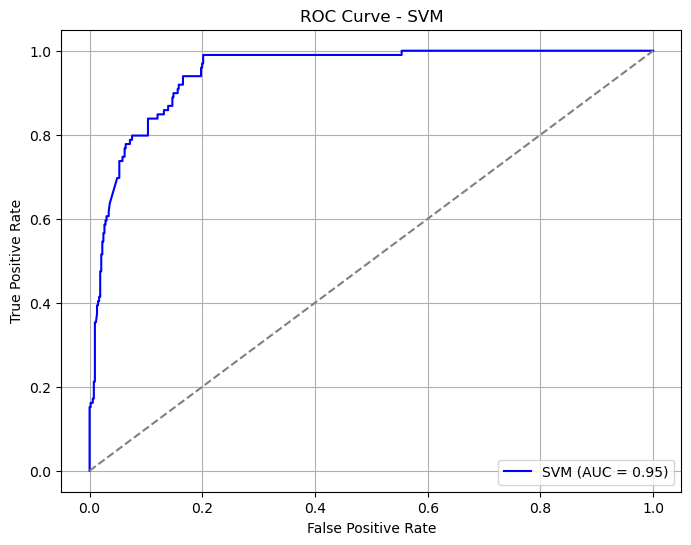

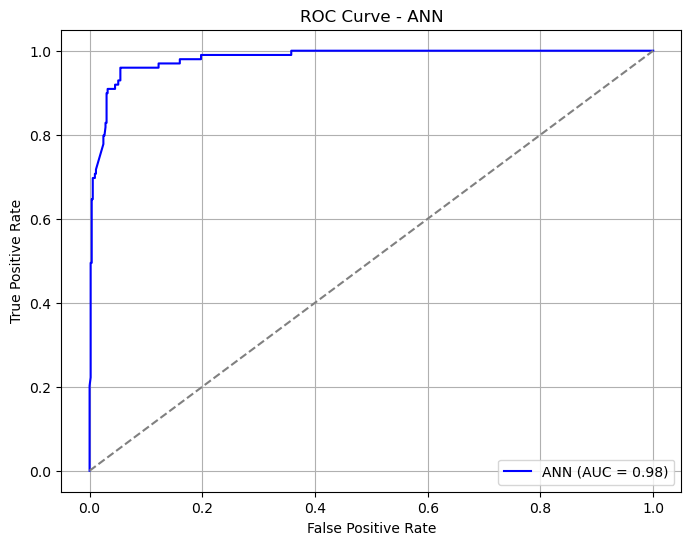

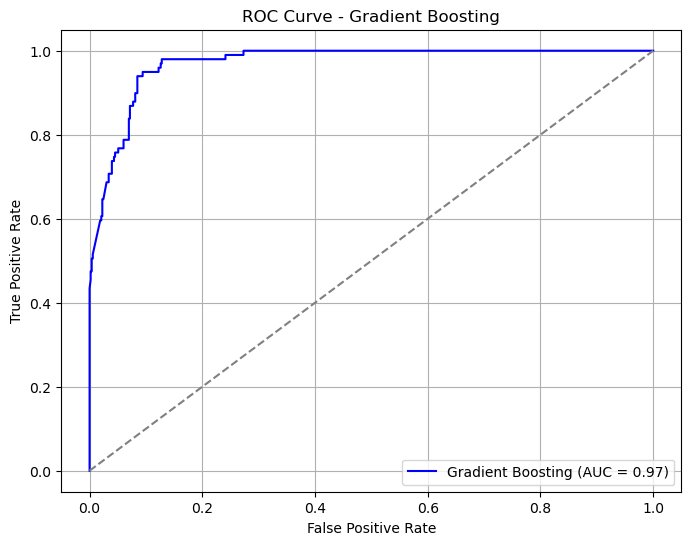

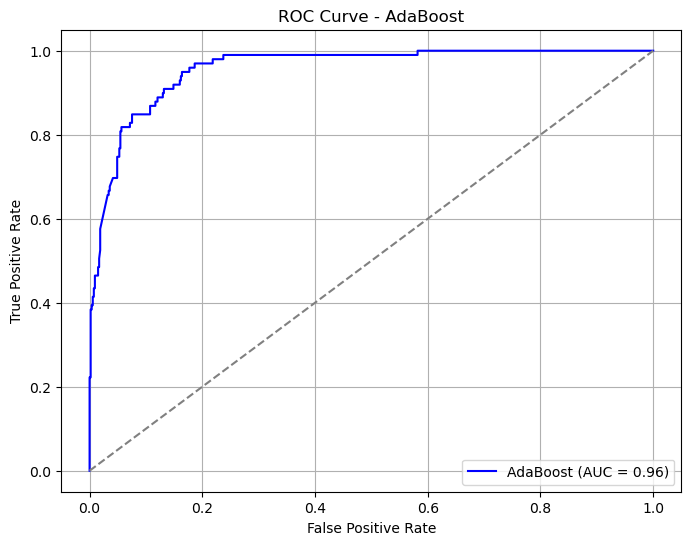

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve for a model
def plot_roc_curve_for_model(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Logistic Regression
plot_roc_curve_for_model(y_test, y_pred_prob_log_reg, "Logistic Regression")

# Decision Tree
plot_roc_curve_for_model(y_test, y_pred_prob_dt, "Decision Tree")

# Random Forest
plot_roc_curve_for_model(y_test, y_pred_prob_rf, "Random Forest")

# XGBoost
plot_roc_curve_for_model(y_test, y_pred_prob_xgb, "XGBoost")

# KNN
plot_roc_curve_for_model(y_test, y_pred_prob_knn, "KNN")

# Naive Bayes
plot_roc_curve_for_model(y_test, y_pred_prob_nb, "Naive Bayes")

# SVM
plot_roc_curve_for_model(y_test, y_pred_prob_svm, "SVM")

# ANN
plot_roc_curve_for_model(y_test, y_pred_prob_ann, "ANN")

# Gradient Boosting
plot_roc_curve_for_model(y_test, y_pred_prob_gb, "Gradient Boosting")

# AdaBoosting
plot_roc_curve_for_model(y_test, y_pred_prob_ab, "AdaBoost")

**Combine all ROC curves into a single plot**

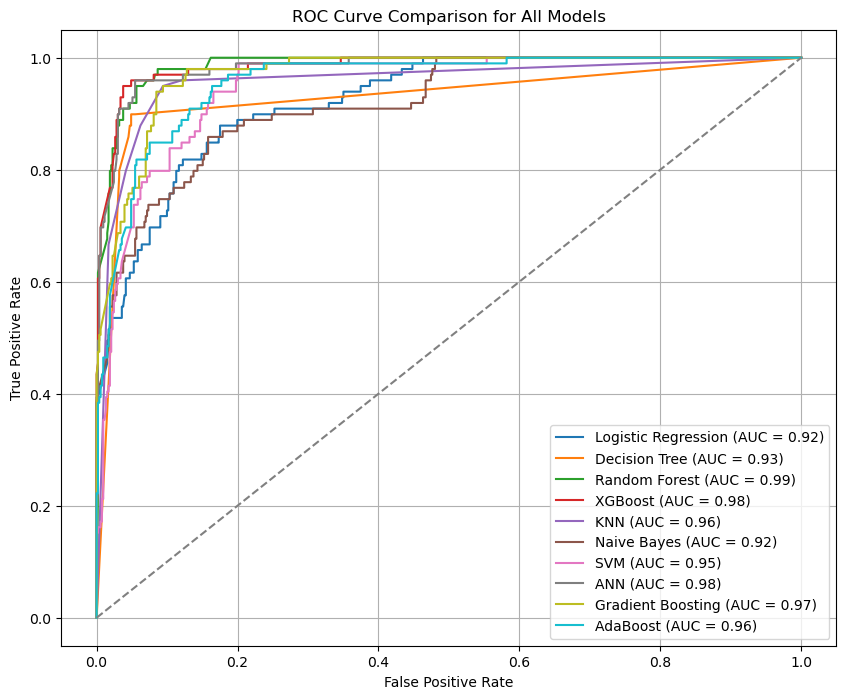

In [ ]:
# Combine all ROC curves into a single plot
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {roc_auc_ann:.2f})')

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# AdaBoosting
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_pred_prob_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)
plt.plot(fpr_ab, tpr_ab, label=f'AdaBoost (AUC = {roc_auc_ab:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.title('ROC Curve Comparison for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Summarize performance for all models**

In [ ]:
# Summarize performance for all models
model_performance = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost",
        "KNN", "Naive Bayes", "SVM", "ANN", "Gradient Boosting", "AdaBoost"
    ],
    "Accuracy": [
        accuracy_log_reg, accuracy_dt, accuracy_rf, accuracy_xgb,
        accuracy_knn, accuracy_nb, accuracy_svm, accuracy_ann, accuracy_gb, accuracy_ab
    ],
    "Precision (Churn)": [
        classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_ann, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_ab, output_dict=True)['1']['precision']
    ],
    "Recall (Churn)": [
        classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_ann, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_ab, output_dict=True)['1']['recall']
    ],
    "F1-Score (Churn)": [
        classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_svm, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_ann, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_ab, output_dict=True)['1']['f1-score']
    ],
    "ROC-AUC Score": [
        roc_auc_score(y_test, y_pred_prob_log_reg),
        roc_auc_score(y_test, y_pred_prob_dt),
        roc_auc_score(y_test, y_pred_prob_rf),
        roc_auc_score(y_test, y_pred_prob_xgb),
        roc_auc_score(y_test, y_pred_prob_knn),
        roc_auc_score(y_test, y_pred_prob_nb),
        roc_auc_score(y_test, y_pred_prob_svm),
        roc_auc_score(y_test, y_pred_prob_ann),
        roc_auc_score(y_test, y_pred_prob_gb),
        roc_auc_score(y_test, y_pred_prob_ab)
    ]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance table
print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                 Model  Accuracy  Precision (Churn)  Recall (Churn)  \
0  Logistic Regression  0.842857           0.500000        0.828283   
1        Decision Tree  0.941270           0.776786        0.878788   
2        Random Forest  0.950794           0.814815        0.888889   
3              XGBoost  0.957143           0.839623        0.898990   
4                  KNN  0.928571           0.725000        0.878788   
5          Naive Bayes  0.722222           0.351562        0.909091   
6                  SVM  0.853968           0.520468        0.898990   
7                  ANN  0.949206           0.796460        0.909091   
8    Gradient Boosting  0.914286           0.669173        0.898990   
9             AdaBoost  0.887302           0.600000        0.848485   

   F1-Score (Churn)  ROC-AUC Score  
0          0.623574       0.924233  
1          0.824645       0.929540  
2          0.850242       0.985514  
3          0.868293       0.984982  
4  

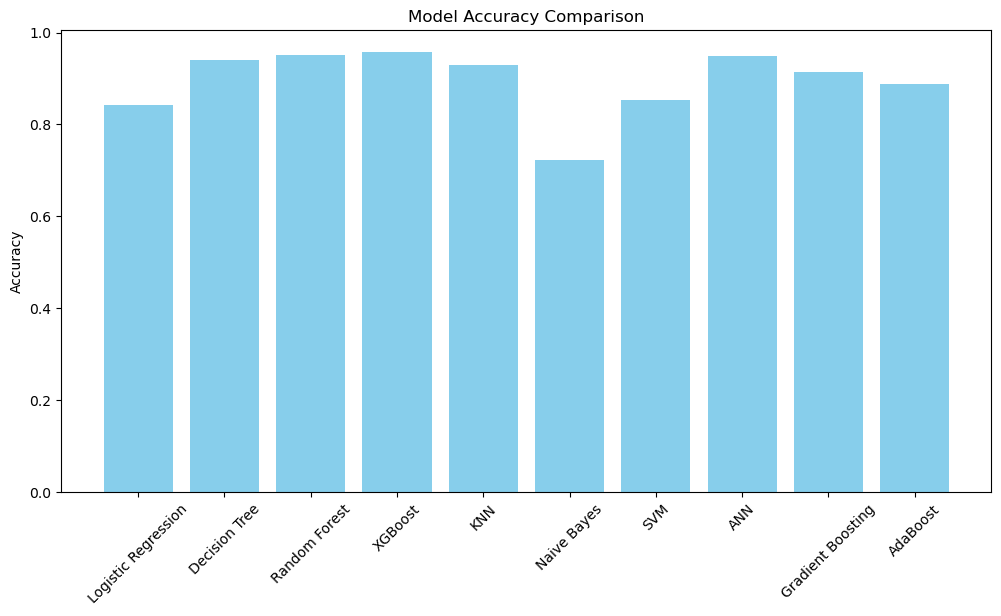

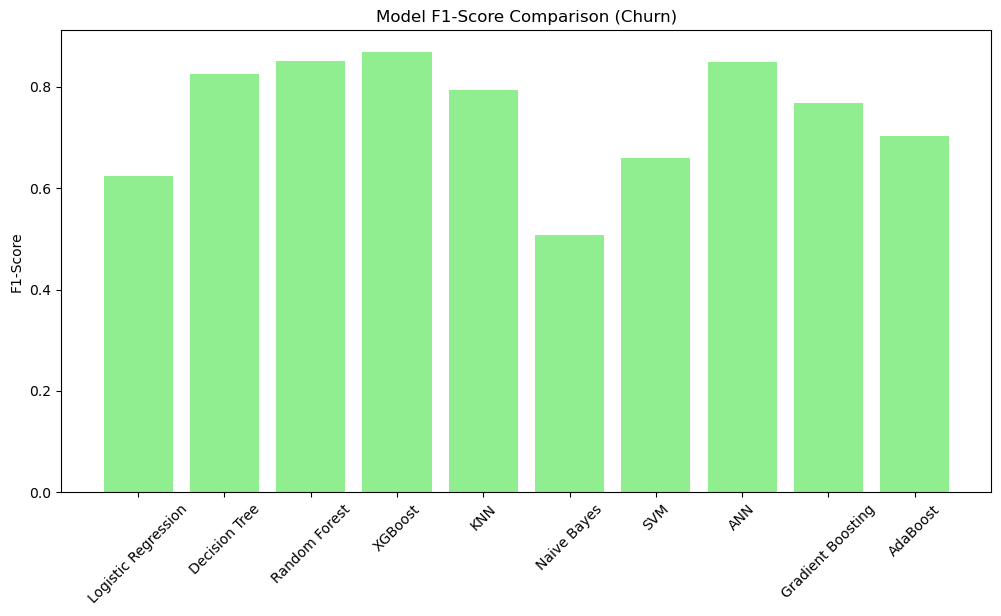

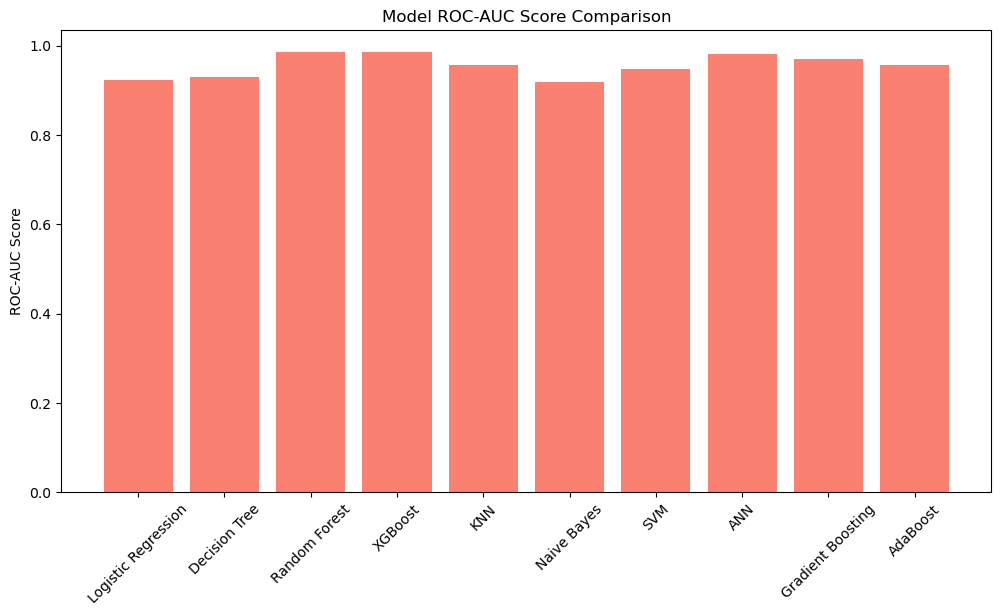

In [ ]:


import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Model'], performance_df['Accuracy'], color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot F1-Score for Churn
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Model'], performance_df['F1-Score (Churn)'], color='lightgreen')
plt.title("Model F1-Score Comparison (Churn)")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

# Plot ROC-AUC Scores
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Model'], performance_df['ROC-AUC Score'], color='salmon')
plt.title("Model ROC-AUC Score Comparison")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45)
plt.show()